# Predykcja cen samochodów

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('vehicles.csv')

## Analiza wstępna

In [3]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

In [5]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.238570e+05,4.238570e+05,328743.000000,2.705850e+05,0.0,324404.000000,324404.000000
mean,7.190602e+09,5.779437e+04,2009.827358,9.942578e+04,NaN,38.731429,-93.949367
std,5.159269e+06,1.002581e+07,10.135809,1.204833e+05,NaN,5.902977,17.930566
min,7.178302e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-80.386400,-161.394000
25%,7.186688e+09,4.499000e+03,2007.000000,4.432400e+04,NaN,35.054500,-106.678000
50%,7.192068e+09,9.995000e+03,2012.000000,9.174900e+04,NaN,39.366900,-88.009900
75%,7.194909e+09,1.899500e+04,2016.000000,1.372370e+05,NaN,42.517075,-80.832500
max,7.197006e+09,3.808256e+09,2021.000000,1.000000e+07,NaN,80.383400,115.524000


In [6]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year             95114
manufacturer    110615
model            98473
condition       247138
cylinders       226178
fuel             96643
odometer        153272
title_status     96098
transmission     95792
vin             239437
drive           192738
size            321230
type            182700
paint_color     201654
image_url        94196
description      94203
county          423857
state                0
lat              99453
long             99453
dtype: int64

### Wnioski wstępne

423857 rekordy 25 kolumn. Celem jest predykcja ceny samochodów. Część kolumn zostanie usunięta. W datasecie występują duże braki, również w kolumnach, na których nam zależy.

## Analiza szczegółowa

Usuniemy kolumny, które nie będą miały znaczenia.

In [53]:
df = df.drop(['id','url', 'region_url', 'vin', 'image_url', 'description', 'lat', 'long','county','region'], axis = 1)

In [9]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn


Zajmiemy się outlierami.

In [18]:
df['price'].sort_values(ascending=False)

300026    3808256046
207260    2808348671
74638     2632269824
67033     2490531375
83332     2039470154
             ...    
362001             0
199263             0
362004             0
263809             0
116587             0
Name: price, Length: 423857, dtype: int64

In [24]:
df['price'].value_counts().sort_values(ascending=False)

0        35025
3500      3865
8995      3589
7995      3537
4500      3465
         ...  
38575        1
9872         1
23930        1
71981        1
9584         1
Name: price, Length: 16305, dtype: int64

In [22]:
df.head().sort_values(by='price', ascending=False)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn


In [55]:
df['price'].value_counts().sort_values(ascending=False)

3500     3865
8995     3589
7995     3537
4500     3465
6995     3458
         ... 
170         1
6094        1
25566       1
830         1
9584        1
Name: price, Length: 16194, dtype: int64

<AxesSubplot:xlabel='odometer', ylabel='price'>

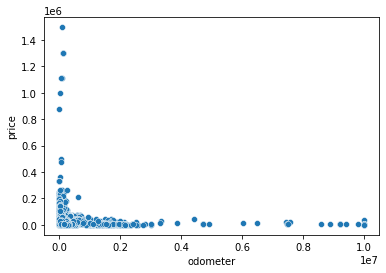

In [56]:
sns.scatterplot(x="odometer", y="price", data=df)

Wykres ceny od przebiegu. Widać duży rozrzut, dużo outlierów.

In [50]:
df['price'].sort_values(ascending=False)

204950    265000
256716    265000
325244    262900
242766    261967
80825     250000
           ...  
112823       101
144471       101
339958       101
117494       101
147242       101
Name: price, Length: 386045, dtype: int64

In [60]:
df = df[(df['price'] > 100) & (df['price'] < 100000)]

<AxesSubplot:xlabel='odometer', ylabel='price'>

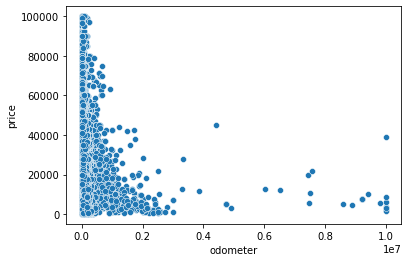

In [61]:
sns.scatterplot(x="odometer", y="price", data=df)

Wykres ceny od przebiegu po zawężeniu (100 do 100000)

<Figure size 864x576 with 0 Axes>

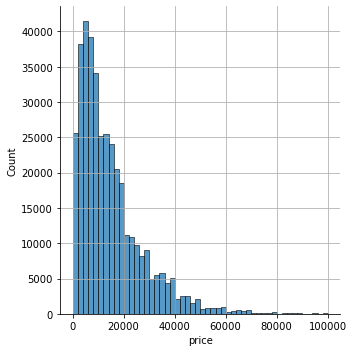

In [63]:
plt.figure(figsize=(12,8))
sns.displot(df['price'], bins = 50)
plt.grid(visible = True)

Rozkład cen.

<Figure size 864x576 with 0 Axes>

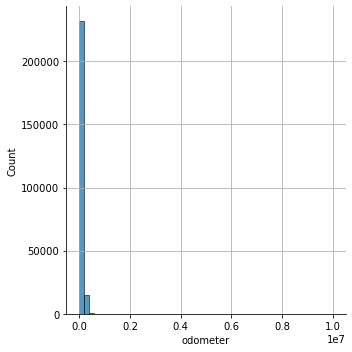

In [65]:
plt.figure(figsize=(12,8))
sns.displot(df['odometer'], bins = 50)
plt.grid(visible = True)

Rozkład przebiegu, wydłużony przez outliery.

In [68]:
df=df[(df.odometer < 3000000)]

<AxesSubplot:xlabel='odometer', ylabel='price'>

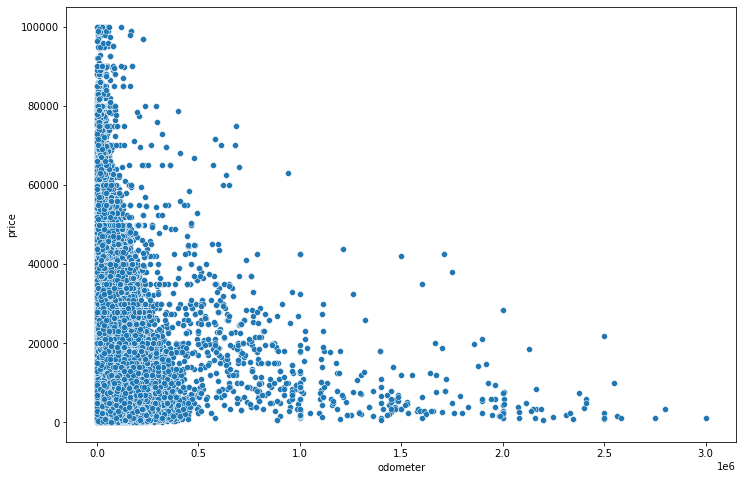

In [77]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="odometer", y="price", data=dfb)

Wykres ceny od przebiegu po usunięciu samochodów z przebiegiem powyżej 3000000.

<AxesSubplot:xlabel='year', ylabel='price'>

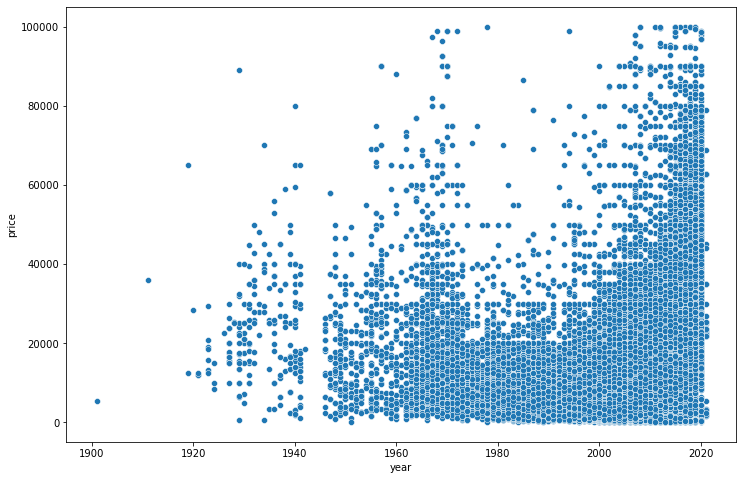

In [82]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="year", y="price", data=df)

Rozkład cen w czasie.
Jako ciekawostka- widać, że w czasie wojny (1939- 1945) produkcja został zatrzymana.

In [85]:
df = df[df.year > 1945]

<AxesSubplot:xlabel='year', ylabel='price'>

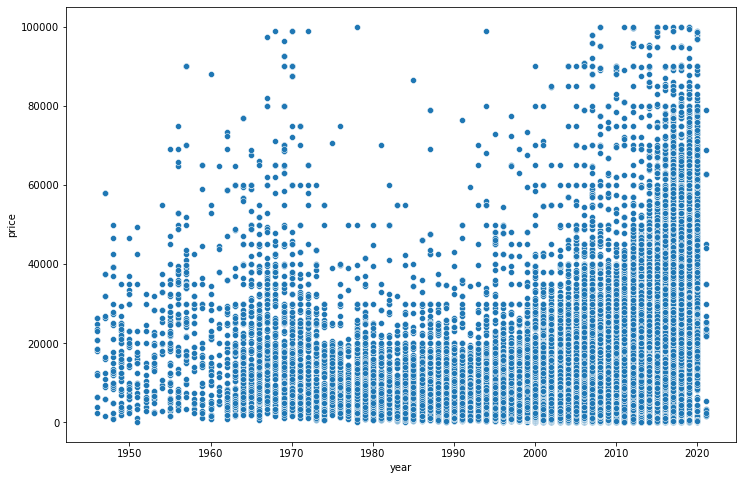

In [87]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="year", y="price", data=df)

Wykres cen od czasu po ustaleniu minimalnego roku na 1945.

In [90]:
df["year"].isna().sum()

0

### Ograniczyliśmy dataset do samochodów, które: 
- kosztują między 100 a 100000
- mają przebieg do 3000000 (powodzenia z takim autem co ma kilka milionów przejechane XD)
- rok produkcji po 1945 (po wojnie)

Dataset jest teraz bardziej czytelny i stabilny

In [98]:
null_val = df.isnull().sum()
null_val = pd.DataFrame(null_val, columns = ['null'])
null_val['percentage'] = round(null_val['null']/len(df) * 100, 2)
null_val

,null,percentage
price,0,0.00
year,0,0.00
manufacturer,9082,3.69
model,1853,0.75
condition,103398,41.95
cylinders,83955,34.06
fuel,1873,0.76
odometer,0,0.00
title_status,1341,0.54
transmission,1111,0.45


Kolumna condition może być uzupełniona średnimi wartościami przebiegu.

In [99]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 75930.94
Excellent average odometer: 106310.64
Good average odometer: 112554.19
Fair average odometer: 182200.0
Salvage average odometer: 168585.96


In [100]:
df.loc[df.year>=2020, 'condition'] = df.loc[df.year>=2020, 'condition'].fillna('new')

df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [102]:
null_val = df.isnull().sum()
null_val = pd.DataFrame(null_val, columns = ['null'])
null_val['percentage'] = round(null_val['null']/len(df) * 100, 2)
null_val

,null,percentage
price,0,0.00
year,0,0.00
manufacturer,9082,3.69
model,1853,0.75
condition,0,0.00
cylinders,83955,34.06
fuel,1873,0.76
odometer,0,0.00
title_status,1341,0.54
transmission,1111,0.45


Najniższe wartości NaN zostaną usunięte

In [103]:
df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])

Kolumna size zostanie usunięta

In [104]:
df = df.drop('size', axis = 1)

Pozostałe braki uzupełnimy przez ffill

In [105]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')

In [106]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            3
paint_color     0
state           0
dtype: int64

In [107]:
df = df.dropna()

### Braki uzupełnione

Text(0.5, 1.0, 'Stan samochodu a cena')

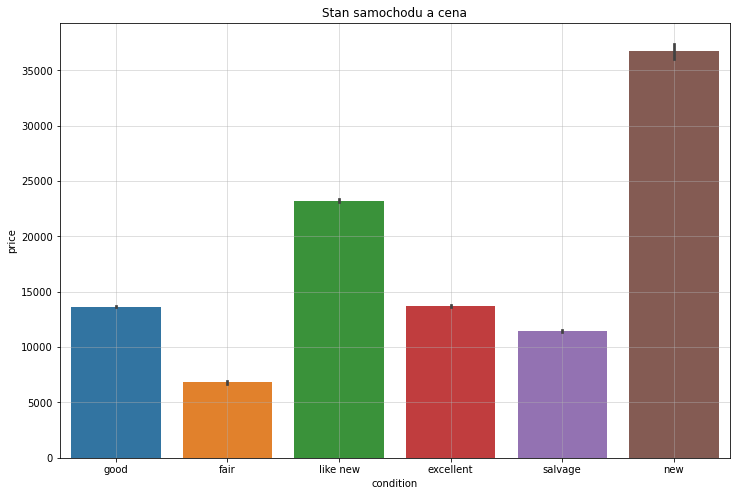

In [116]:
plt.figure(figsize=(12,8))

sns.barplot(x='condition', y='price', data=df);
plt.grid(visible = True, alpha = 0.5)
plt.title('Stan samochodu a cena')

Samochody nowe i prawie nowe są najdroższe.

Text(0.5, 1.0, 'Ilość cylindrów a cena')

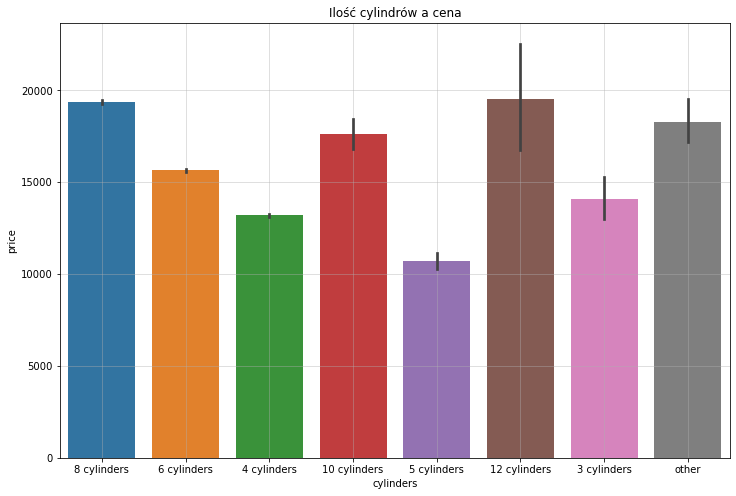

In [119]:
plt.figure(figsize=(12,8))

sns.barplot(x='cylinders', y='price', data=df);
plt.grid(visible = True, alpha = 0.5)
plt.title('Ilość cylindrów a cena')

Samochody z największą ilością cylindrów są droższe.

Text(0.5, 1.0, 'Rodzaj paliwa a cena')

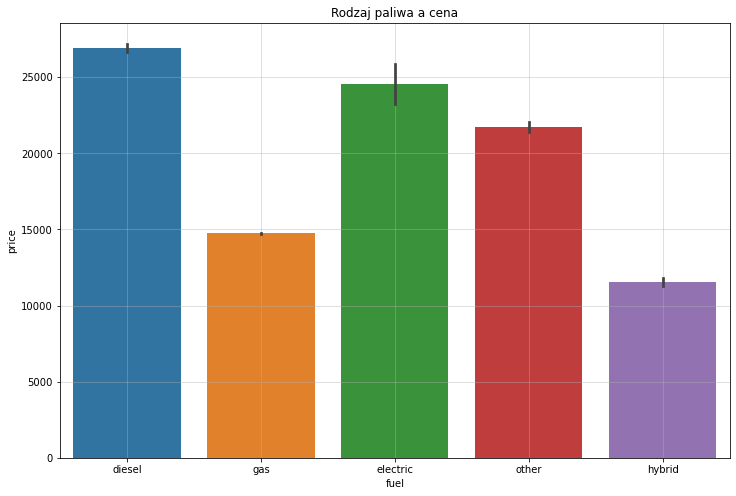

In [121]:
plt.figure(figsize=(12,8))

sns.barplot(x='fuel', y='price', data=df);
plt.grid(visible = True, alpha = 0.5)
plt.title('Rodzaj paliwa a cena')

Text(0.5, 1.0, 'Napęd a cena')

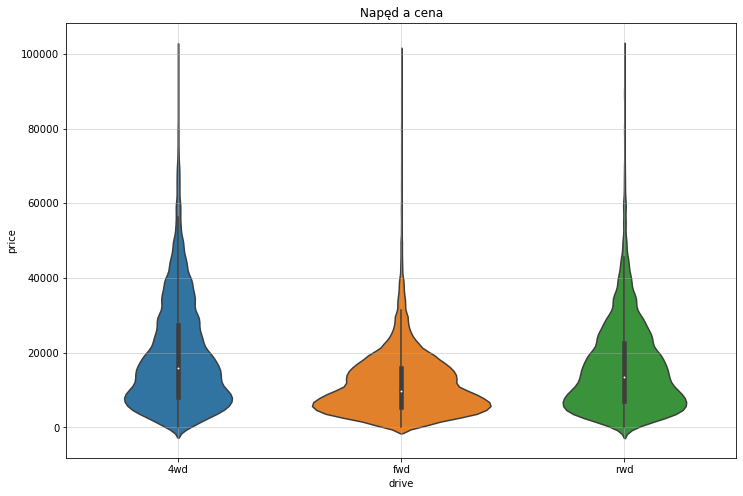

In [123]:
plt.figure(figsize=(12,8))

sns.violinplot(x=df.drive, y=df.price)
plt.grid(visible = True, alpha = 0.5)
plt.title('Napęd a cena')

Napęd 4wd i rwd mają podobny rozkład, 4wd osiąga największe ceny.

<Figure size 864x576 with 0 Axes>

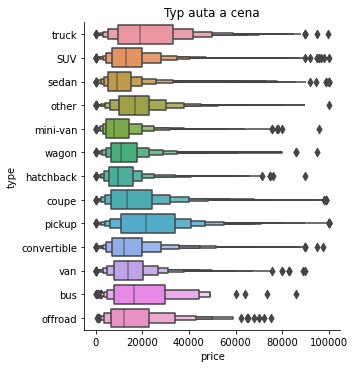

In [127]:
plt.figure(figsize=(12,8))
sns.catplot(y="type", x="price",kind="boxen", data=df)
plt.title('Typ auta a cena');

# Przygotowanie danych do ML

In [129]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

<AxesSubplot:>

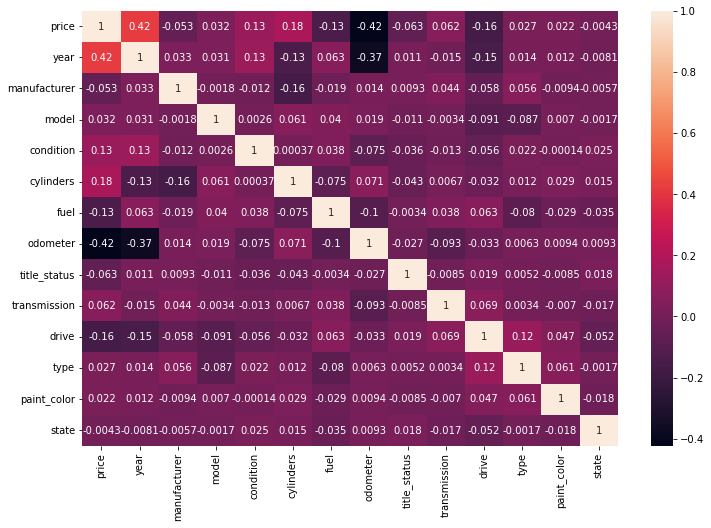

In [130]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot=True)

Kolumna state ma znikomą korelację z ceną.

In [131]:
df = df.drop('state', axis = 1)

In [132]:
from sklearn.model_selection import train_test_split

y= df.price
X= df.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [148]:
from sklearn.preprocessing import StandardScaler

se = StandardScaler()

X_train = se.fit_transform(X_train)
X_test = se.transform(X_test)

## Modelowanie

### Las losowy

In [157]:
model = RandomForestRegressor(max_depth = 7, min_samples_leaf = 3)
model.fit(X_train, y_train)

prediction = model.predict(X_test)


print('\033[1m' + f'R2: {round(r2_score(y_test,prediction), 2)}')
print(f'mean absolute error: {round(mean_absolute_error(y_test,prediction), 2)}')
print(f'mean squared error: {round(mean_squared_error(y_test,prediction), 2)}')
print(f'root mean squared error: {round((np.sqrt(mean_squared_error(y_test,prediction))), 2)}')

R2: 0.65
mean absolute error: 4839.44
mean squared error: 55067086.27
root mean squared error: 7420.72


### XGB

In [159]:
model = XGBRegressor(n_estimators=200)
model.fit(X_train, y_train)

prediction = model.predict(X_test)


print('\033[1m' + f'R2: {round(r2_score(y_test,prediction), 2)}')
print(f'mean absolute error: {round(mean_absolute_error(y_test,prediction), 2)}')
print(f'mean squared error: {round(mean_squared_error(y_test,prediction), 2)}')
print(f'root mean squared error: {round((np.sqrt(mean_squared_error(y_test,prediction))), 2)}')

R2: 0.88
mean absolute error: 2346.49
mean squared error: 18009320.82
root mean squared error: 4243.74


## Wnioski
Najlepsze wyniki osiągnął XGB. Dataset jest duży i jest jeszcze wiele możliwości przygotowania go do modelowania.